<a href="https://colab.research.google.com/github/AdailtonFreire/supermarket_sales---sheet1/blob/main/supermarket_sales_sheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Carga dos dados**

Esse código permite que o notebook acesse o meu drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importação do arquivo para um DataFrame**



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_sales - Sheet1.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conferência pós-importação:
Visão inicial da importação - objetiva conferir a carga dos dados**

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Mostrar a dimensão do dataset**
**O primeiro valor é a quantidade de linhas e o segunda valor é a quantidade de colunas**

In [ ]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 17)

**Exibindo todo o dataset. As linhas inicias e finais**

In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**O exemplo mostra o Slice que é a partição do dataset. No exemplo pedimos do id 10 até o id 20**

In [ ]:
data [10:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9
18,329-62-1586,A,Yangon,Normal,Male,Food and beverages,54.67,3,8.2005,172.2105,1/21/2019,18:00,Credit card,164.01,4.761905,8.2005,8.6
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,3/11/2019,15:30,Ewallet,80.60,4.761905,4.0300,4.4


**Conferindo a partição**

In [ ]:
sliced_linhas = data[9:20]
sliced_linhas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9
18,329-62-1586,A,Yangon,Normal,Male,Food and beverages,54.67,3,8.2005,172.2105,1/21/2019,18:00,Credit card,164.01,4.761905,8.2005,8.6


**Identificar o tipo de objeto, neste caso ela indica que o objeto é um DataFrame**

In [ ]:
type(sliced_linhas)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

**Selecionando colunas**

In [ ]:
sliced_colunas = data[['Gender', 'Product line']]
sliced_colunas.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Gender,Product line
0,Female,Health and beauty
1,Female,Electronic accessories
2,Male,Home and lifestyle
3,Male,Health and beauty
4,Male,Sports and travel
5,Male,Electronic accessories
6,Female,Electronic accessories
7,Female,Home and lifestyle
8,Female,Health and beauty
9,Female,Food and beverages


**Exibindo linhas específicas usando "iloc" e "loc". No exemplo, a linha 5 foi apresentada**

In [ ]:
data.iloc[5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,5
Invoice ID,699-14-3026
Branch,C
City,Naypyitaw
Customer type,Normal
Gender,Male
Product line,Electronic accessories
Unit price,85.39
Quantity,7
Tax 5%,29.8865
Total,627.6165


**Selecionando uma coluna**

In [ ]:
data.loc[:,"City"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,City
0,Yangon
1,Naypyitaw
2,Yangon
3,Yangon
4,Yangon
...,...
995,Naypyitaw
996,Mandalay
997,Yangon
998,Yangon


Filtrando linhas de "Health and beauty" da coluna "Product line"

select * from data where class = 'Health and beauty'

In [ ]:
data.loc[data['Product line'] == 'Health and beauty']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14:42,Ewallet,29.52,4.761905,1.4760,4.3
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,1/3/2019,19:08,Credit card,496.00,4.761905,24.8000,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4


**Lista dos nomes das colunas**

In [ ]:
cols = data.columns
cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**Renomeando colunas**

In [ ]:
newcols = {'Invoice ID' : "ID da Fatura", 'Branch' : "Filial", 'City' : "Cidade", 'Customer type' : "Tipo de cliente", 'Gender' : "Gênero",
       'Product line' : "Linha de Produtos", 'Unit price' : "Preço Unitário", 'Quantity' : "Quantidade", 'Tax 5%' : "Taxa 5%", 'Total' : 'Total', 'Date' : "Data",
       'Time' : "Hora", 'Payment' : "Método de Pagamento", 'cogs' : "Custo das Mercadorias Vendidas", 'gross margin percentage' : "Percentual de Margem Bruta", 'gross income' : "Receita Bruta", 'Rating' :"Avaliação"}

data.rename(columns=newcols, inplace=True)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Filial,Cidade,Tipo de cliente,Gênero,Linha de Produtos,Preço Unitário,Quantidade,Taxa 5%,Total,Data,Hora,Método de Pagamento,Custo das Mercadorias Vendidas,Percentual de Margem Bruta,Receita Bruta,Avaliação
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Renomeando as linhas**

In [ ]:
newrows = {
    "Member" : "Membro",
    "Female" : "Feminino",
    "Male" : "Masculino",
    "Health and beauty" : "Saúde e beleza",
    "Electronic accessories" : "Acessórios eletrônicos",
    "Home and lifestyle" : "Casa e estilo de vida",
    "Sports and travel" : "Esportes e viagem",
    "Food and beverages" : "Alimentos e bebidas",
    "Fashion accessories" : "Acessórios de moda",
    "Ewallet" : "Cartão digital",
    "Cash" : "Dinheiro",
    "Credit card" : "Cartão de crédito"
}

data = data.replace(newrows)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Filial,Cidade,Tipo de cliente,Gênero,Linha de Produtos,Preço Unitário,Quantidade,Taxa 5%,Total,Data,Hora,Método de Pagamento,Custo das Mercadorias Vendidas,Percentual de Margem Bruta,Receita Bruta,Avaliação
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Cartão digital,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartão de crédito,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Cartão digital,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.2085,634.3785,2/8/2019,10:37,Cartão digital,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Masculino,Saúde e beleza,40.35,1,2.0175,42.3675,1/29/2019,13:46,Cartão digital,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Feminino,Casa e estilo de vida,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Cartão digital,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Membro,Masculino,Alimentos e bebidas,31.84,1,1.5920,33.4320,2/9/2019,13:22,Dinheiro,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Masculino,Casa e estilo de vida,65.82,1,3.2910,69.1110,2/22/2019,15:33,Dinheiro,65.82,4.761905,3.2910,4.1


**Formatando a coluna data em datetime.**

In [ ]:
data['Data'] = pd.to_datetime(data['Data'], errors='coerce')
data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Filial,Cidade,Tipo de cliente,Gênero,Linha de Produtos,Preço Unitário,Quantidade,Taxa 5%,Total,Data,Hora,Método de Pagamento,Custo das Mercadorias Vendidas,Percentual de Margem Bruta,Receita Bruta,Avaliação
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,2019-01-05,13:08,Cartão digital,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,2019-03-08,10:29,Dinheiro,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,2019-03-03,13:23,Cartão de crédito,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,2019-01-27,20:33,Cartão digital,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.2085,634.3785,2019-02-08,10:37,Cartão digital,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Masculino,Saúde e beleza,40.35,1,2.0175,42.3675,2019-01-29,13:46,Cartão digital,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Feminino,Casa e estilo de vida,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Cartão digital,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Membro,Masculino,Alimentos e bebidas,31.84,1,1.5920,33.4320,2019-02-09,13:22,Dinheiro,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Masculino,Casa e estilo de vida,65.82,1,3.2910,69.1110,2019-02-22,15:33,Dinheiro,65.82,4.761905,3.2910,4.1


**Formatando os números**

In [ ]:
data ["Taxa 5%"] = data["Taxa 5%"].round(2)
data ["Total"] = data["Total"].round(2)
data ["Percentual de Margem Bruta"] = data["Percentual de Margem Bruta"].round(2)
data ["Receita Bruta"] = data["Receita Bruta"].round(2)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Filial,Cidade,Tipo de cliente,Gênero,Linha de Produtos,Preço Unitário,Quantidade,Taxa 5%,Total,Data,Hora,Método de Pagamento,Custo das Mercadorias Vendidas,Percentual de Margem Bruta,Receita Bruta,Avaliação
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.14,548.97,2019-01-05,13:08,Cartão digital,522.83,4.76,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.82,80.22,2019-03-08,10:29,Dinheiro,76.40,4.76,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.22,340.53,2019-03-03,13:23,Cartão de crédito,324.31,4.76,16.22,7.4
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.29,489.05,2019-01-27,20:33,Cartão digital,465.76,4.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.21,634.38,2019-02-08,10:37,Cartão digital,604.17,4.76,30.21,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Masculino,Saúde e beleza,40.35,1,2.02,42.37,2019-01-29,13:46,Cartão digital,40.35,4.76,2.02,6.2
996,303-96-2227,B,Mandalay,Normal,Feminino,Casa e estilo de vida,97.38,10,48.69,1022.49,2019-03-02,17:16,Cartão digital,973.80,4.76,48.69,4.4
997,727-02-1313,A,Yangon,Membro,Masculino,Alimentos e bebidas,31.84,1,1.59,33.43,2019-02-09,13:22,Dinheiro,31.84,4.76,1.59,7.7
998,347-56-2442,A,Yangon,Normal,Masculino,Casa e estilo de vida,65.82,1,3.29,69.11,2019-02-22,15:33,Dinheiro,65.82,4.76,3.29,4.1


**Estatística básica**

In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Preço Unitário,Quantidade,Taxa 5%,Total,Data,Custo das Mercadorias Vendidas,Percentual de Margem Bruta,Receita Bruta,Avaliação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379510,322.966820,2019-02-14 00:05:45.600000,307.58738,4.760000e+00,15.379510,6.97270
min,10.080000,1.000000,0.510000,10.680000,2019-01-01 00:00:00,10.17000,4.760000e+00,0.510000,4.00000
25%,32.875000,3.000000,5.927500,124.425000,2019-01-24 00:00:00,118.49750,4.760000e+00,5.927500,5.50000
50%,55.230000,5.000000,12.090000,253.850000,2019-02-13 00:00:00,241.76000,4.760000e+00,12.090000,7.00000
75%,77.935000,8.000000,22.445000,471.350000,2019-03-08 00:00:00,448.90500,4.760000e+00,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.760000e+00,49.650000,10.00000
std,26.494628,2.923431,11.708842,245.885398,NaN,234.17651,1.208527e-13,11.708842,1.71858


**Estatística básica:**
**Calculando a soma, a média e a mediana de uma coluna particular**

In [ ]:
soma_data = round(data["Total"].sum(), 2)
media_data = round(data["Total"].mean(), 2)
mediana_data = round(data["Total"].median(), 2)

print(f"Soma: {soma_data}")
print(f"Média: {media_data}")
print(f"Mediana: {mediana_data}")

Soma: 322966.82
Média: 322.97
Mediana: 253.85


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Valor mínimo e máximo de uma coluna**

In [ ]:
min_data = round(data["Total"].min(), 2)
max_data = round(data["Total"].max(), 2)

print(f"Mínimo: {min_data}")
print(f"Máximo: {max_data}")

Mínimo: 10.68
Máximo: 1042.65


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Destacando o valor máximo e mínimos por coluna**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID da Fatura                    1000 non-null   object        
 1   Filial                          1000 non-null   object        
 2   Cidade                          1000 non-null   object        
 3   Tipo de cliente                 1000 non-null   object        
 4   Gênero                          1000 non-null   object        
 5   Linha de Produtos               1000 non-null   object        
 6   Preço Unitário                  1000 non-null   float64       
 7   Quantidade                      1000 non-null   int64         
 8   Taxa 5%                         1000 non-null   float64       
 9   Total                           1000 non-null   float64       
 10  Data                            1000 non-null   datetime64[ns]
 11  Hora 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Correlação. Mudanças na quantidade não estão associadas às mudanças nas avaliações**
**Assim como na correlação de Pearson, a correlação de Spearman também não mostra uma relação clara entre a quantidade de produtos comprados e a avaliação.**

In [ ]:
data_correlacao = data[["Quantidade", "Avaliação"]].corr(method='pearson')
data_correlacao

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantidade,Avaliação
Quantidade,1.000000,-0.015815
Avaliação,-0.015815,1.000000


In [ ]:
correlacao_spearman = data[["Quantidade", "Avaliação"]].corr(method='spearman')
correlacao_spearman

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantidade,Avaliação
Quantidade,1.000000,-0.015453
Avaliação,-0.015453,1.000000


**Preferência pelo método de pagamento**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


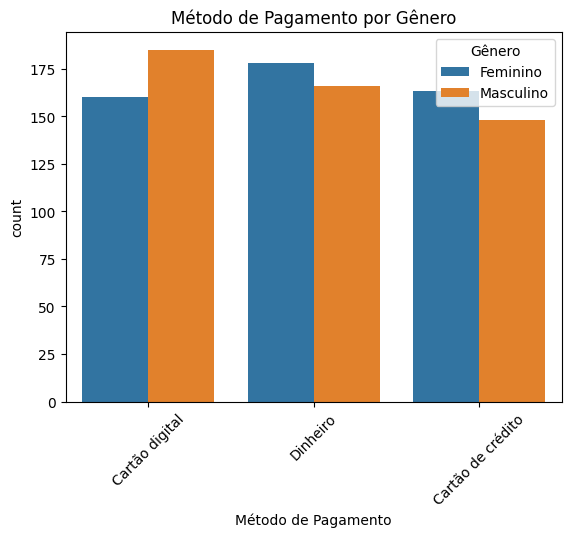

In [ ]:
sns.countplot(x="Método de Pagamento", hue="Gênero", data=data)
plt.title('Método de Pagamento por Gênero')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


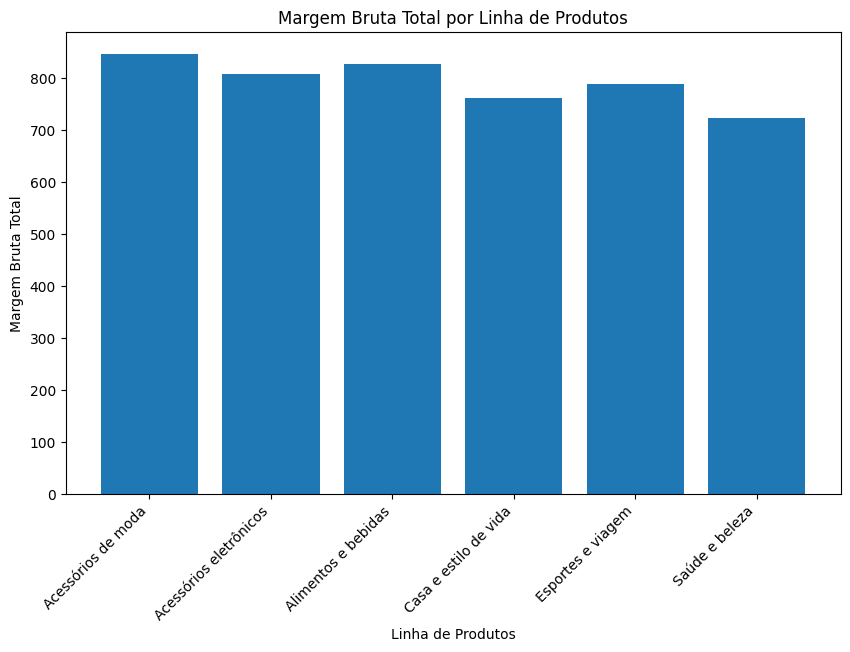

In [ ]:
lucratividade_por_categoria = data.groupby('Linha de Produtos').agg(
    receita_bruta_total = ('Receita Bruta', 'sum'),
    margem_bruta_total = ('Percentual de Margem Bruta', 'sum')
)
plt.figure(figsize=(10, 6))
plt.bar(lucratividade_por_categoria.index, lucratividade_por_categoria['margem_bruta_total'])
plt.title('Margem Bruta Total por Linha de Produtos')
plt.xlabel('Linha de Produtos')
plt.ylabel('Margem Bruta Total')
plt.xticks(rotation=45, ha='right')

plt.show()

Extraindo itens excluisivos

In [ ]:
transacoes_genero = data.groupby('ID da Fatura')['Gênero'].apply(list).reset_index()
transacoes_genero

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Gênero
0,101-17-6199,[Masculino]
1,101-81-4070,[Feminino]
2,102-06-2002,[Masculino]
3,102-77-2261,[Masculino]
4,105-10-6182,[Masculino]
...,...,...
995,894-41-5205,[Feminino]
996,895-03-6665,[Feminino]
997,895-66-0685,[Masculino]
998,896-34-0956,[Masculino]


In [ ]:
transacoes_produto = data.groupby('ID da Fatura')['Linha de Produtos'].apply(list).reset_index()
transacoes_produto

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Linha de Produtos
0,101-17-6199,[Alimentos e bebidas]
1,101-81-4070,[Saúde e beleza]
2,102-06-2002,[Esportes e viagem]
3,102-77-2261,[Saúde e beleza]
4,105-10-6182,[Acessórios de moda]
...,...,...
995,894-41-5205,[Alimentos e bebidas]
996,895-03-6665,[Acessórios de moda]
997,895-66-0685,[Alimentos e bebidas]
998,896-34-0956,[Acessórios de moda]


Usando o pd.merge para combinar os DataFrames

In [ ]:
transacoes = pd.merge(transacoes_genero, transacoes_produto, on='ID da Fatura')
transacoes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID da Fatura,Gênero,Linha de Produtos
0,101-17-6199,[Masculino],[Alimentos e bebidas]
1,101-81-4070,[Feminino],[Saúde e beleza]
2,102-06-2002,[Masculino],[Esportes e viagem]
3,102-77-2261,[Masculino],[Saúde e beleza]
4,105-10-6182,[Masculino],[Acessórios de moda]
...,...,...,...
995,894-41-5205,[Feminino],[Alimentos e bebidas]
996,895-03-6665,[Feminino],[Acessórios de moda]
997,895-66-0685,[Masculino],[Alimentos e bebidas]
998,896-34-0956,[Masculino],[Acessórios de moda]


In [ ]:
!pip install apyori==1.1.2
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from apyori import apriori


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transacoes = data.groupby('ID da Fatura')[['Gênero', 'Linha de Produtos']].apply(lambda x: x.values.tolist()).tolist()
transacoes = [[str(item) for sublist in transaction for item in sublist] for transaction in transacoes]
transacoes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Masculino', 'Alimentos e bebidas'],
 ['Feminino', 'Saúde e beleza'],
 ['Masculino', 'Esportes e viagem'],
 ['Masculino', 'Saúde e beleza'],
 ['Masculino', 'Acessórios de moda'],
 ['Masculino', 'Esportes e viagem'],
 ['Masculino', 'Casa e estilo de vida'],
 ['Feminino', 'Acessórios de moda'],
 ['Feminino', 'Esportes e viagem'],
 ['Feminino', 'Alimentos e bebidas'],
 ['Masculino', 'Acessórios de moda'],
 ['Feminino', 'Acessórios eletrônicos'],
 ['Feminino', 'Acessórios de moda'],
 ['Feminino', 'Acessórios de moda'],
 ['Feminino', 'Casa e estilo de vida'],
 ['Masculino', 'Acessórios eletrônicos'],
 ['Feminino', 'Alimentos e bebidas'],
 ['Feminino', 'Acessórios eletrônicos'],
 ['Masculino', 'Saúde e beleza'],
 ['Feminino', 'Esportes e viagem'],
 ['Feminino', 'Acessórios eletrônicos'],
 ['Feminino', 'Acessórios de moda'],
 ['Feminino', 'Casa e estilo de vida'],
 ['Masculino', 'Saúde e beleza'],
 ['Masculino', 'Esportes e viagem'],
 ['Masculino', 'Alimentos e bebidas'],
 ['Masculino', 'Ac

Códificação one-hot

In [ ]:
codificador = TransactionEncoder().fit(transacoes)
codificador

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TransactionEncoder()

In [ ]:
onehot = codificador.transform(transacoes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Convertendo dados para o DataFrame

In [ ]:
onehot = pd.DataFrame(onehot, columns=codificador.columns_)
onehot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Acessórios de moda,Acessórios eletrônicos,Alimentos e bebidas,Casa e estilo de vida,Esportes e viagem,Feminino,Masculino,Saúde e beleza
0,False,False,True,False,False,False,True,False
1,False,False,False,False,False,True,False,True
2,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,True,False,False
996,True,False,False,False,False,True,False,False
997,False,False,True,False,False,False,True,False
998,True,False,False,False,False,False,True,False


In [ ]:
onehot.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Acessórios de moda,0.178
Acessórios eletrônicos,0.170
Alimentos e bebidas,0.174
Casa e estilo de vida,0.160
Esportes e viagem,0.166
Feminino,0.501
Masculino,0.499
Saúde e beleza,0.152


Os resultados indicam que não há uma associação forte ou relevante entre o gênero feminino e a compra de produtos de acessórios de moda.

In [ ]:
onehot['Feminino + Acessórios de moda'] = np.logical_and(onehot['Feminino'], onehot['Acessórios de moda'])
print(onehot.mean())

Acessórios de moda               0.178
Acessórios eletrônicos           0.170
Alimentos e bebidas              0.174
Casa e estilo de vida            0.160
Esportes e viagem                0.166
Feminino                         0.501
Masculino                        0.499
Saúde e beleza                   0.152
Feminino + Acessórios de moda    0.096
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
onehot = onehot.drop('Feminino + Acessórios de moda', axis=1)
onehot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Acessórios de moda,Acessórios eletrônicos,Alimentos e bebidas,Casa e estilo de vida,Esportes e viagem,Feminino,Masculino,Saúde e beleza
0,False,False,True,False,False,False,True,False
1,False,False,False,False,False,True,False,True
2,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,True,False,False
996,True,False,False,False,False,True,False,False
997,False,False,True,False,False,False,True,False
998,True,False,False,False,False,False,True,False


Calculando o suporte de feminino e saúde e beleza.

In [ ]:
suporteBD = np.logical_and(onehot['Feminino'], onehot['Saúde e beleza']).mean()
suporteB = onehot['Saúde e beleza'].mean()
suporteD = onehot['Feminino'].mean()
suporteBD, suporteB, suporteD

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.064, 0.152, 0.501)

Calculando a confiança e o lift.

In [ ]:
confianca = suporteBD / suporteB
lift = suporteBD / (suporteB * suporteD)
confianca, lift, suporteD


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.4210526315789474, 0.8404244143292363, 0.501)

Calculando métricas

In [ ]:
from itertools import permutations

def suporteA(itemA, df):
    return float(df[itemA].mean())

def suporteB(itemB, df):
    return float(df[itemB].mean())

def confianca(itemA,itemB,df):
    return float(np.logical_and(df[itemA],df[itemB]).mean() /(df[itemA].mean()))

def lift(itemA,itemB,df):
    return float(np.logical_and(df[itemA],df[itemB]).mean() /(df[itemA].mean() * df[itemB].mean()))

def leverage(itemA,itemB,df):
    return np.logical_and(df[itemA],df[itemB]).mean() - (df[itemA].mean()*df[itemB].mean())

def conviction(itemA, itemB, df):
    suporteAB = np.logical_and(df[itemA], df[itemB]).mean()
    suporteA = df[itemA].mean()
    suportenB = 1.0 - df[itemB].mean()
    suporteAnB = suporteA - suporteAB
    return float(suporteA*suportenB / suporteAnB)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Preparando as métricas para uma apresentação tabular

In [ ]:
item_pairs = list()
for itemA,itemB in permutations(onehot,2):
    item_pairs.append(list((itemA,itemB,
                            onehot[itemA].sum(),onehot[itemB].sum(),
                            np.logical_and(onehot[itemA],onehot[itemB]).sum(),
                            suporteA(itemA, onehot),
                            suporteB(itemB, onehot),
                            confianca(itemA,itemB,onehot),
                            lift(itemA,itemB,onehot),
                            leverage(itemA,itemB,onehot),
                            conviction(itemA, itemB, onehot)
                            )))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualizando as métricas

In [ ]:
item_pairs = pd.DataFrame(item_pairs,columns = ['itemA','itemB',
                                                'countItemA','countItemB',
                                                'countItemA&B',
                                                'Antecedente Suporte',
                                                'Consequente Suporte',
                                                'Confianca',
                                                'Lift',
                                                'Leverage',
                                                'Conviccao'])

item_pairs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemA,itemB,countItemA,countItemB,countItemA&B,Antecedente Suporte,Consequente Suporte,Confianca,Lift,Leverage,Conviccao
0,Acessórios de moda,Acessórios eletrônicos,178,170,0,0.178,0.170,0.000000,0.000000,-0.030260,0.830000
1,Acessórios de moda,Alimentos e bebidas,178,174,0,0.178,0.174,0.000000,0.000000,-0.030972,0.826000
2,Acessórios de moda,Casa e estilo de vida,178,160,0,0.178,0.160,0.000000,0.000000,-0.028480,0.840000
3,Acessórios de moda,Esportes e viagem,178,166,0,0.178,0.166,0.000000,0.000000,-0.029548,0.834000
4,Acessórios de moda,Feminino,178,501,96,0.178,0.501,0.539326,1.076499,0.006822,1.083195
5,Acessórios de moda,Masculino,178,499,82,0.178,0.499,0.460674,0.923195,-0.006822,0.928938
6,Acessórios de moda,Saúde e beleza,178,152,0,0.178,0.152,0.000000,0.000000,-0.027056,0.848000
7,Acessórios eletrônicos,Acessórios de moda,170,178,0,0.170,0.178,0.000000,0.000000,-0.030260,0.822000
8,Acessórios eletrônicos,Alimentos e bebidas,170,174,0,0.170,0.174,0.000000,0.000000,-0.029580,0.826000
9,Acessórios eletrônicos,Casa e estilo de vida,170,160,0,0.170,0.160,0.000000,0.000000,-0.027200,0.840000


Executando Filtragem Multimétrica. Indica uma associação positiva entre a compra de produtos de saúde e beleza por homens.

In [ ]:
rules = item_pairs[item_pairs['Confianca'] > 0.5]

print(len(rules))
rules

6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemA,itemB,countItemA,countItemB,countItemA&B,Antecedente Suporte,Consequente Suporte,Confianca,Lift,Leverage,Conviccao
4,Acessórios de moda,Feminino,178,501,96,0.178,0.501,0.539326,1.076499,0.006822,1.083195
12,Acessórios eletrônicos,Masculino,170,499,86,0.170,0.499,0.505882,1.013792,0.001170,1.013929
18,Alimentos e bebidas,Feminino,174,501,90,0.174,0.501,0.517241,1.032418,0.002826,1.033643
26,Casa e estilo de vida,Masculino,160,499,81,0.160,0.499,0.506250,1.014529,0.001160,1.014684
32,Esportes e viagem,Feminino,166,501,88,0.166,0.501,0.530120,1.058125,0.004834,1.061974
55,Saúde e beleza,Masculino,152,499,88,0.152,0.499,0.578947,1.160215,0.012152,1.189875


Apriori. Computando itemsets frequentes

In [ ]:
from mlxtend.frequent_patterns import apriori
frequente_itemsets = apriori(onehot, min_support=0.05, use_colnames=True)
print(len(frequente_itemsets))
print (frequente_itemsets.head())

20
   support                  itemsets
0    0.178      (Acessórios de moda)
1    0.170  (Acessórios eletrônicos)
2    0.174     (Alimentos e bebidas)
3    0.160   (Casa e estilo de vida)
4    0.166       (Esportes e viagem)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importando regras de associação do Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

Arules = association_rules(frequente_itemsets, num_itemsets=2, metric="support", min_threshold=0.005)

Arules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Feminino),(Acessórios de moda),0.501,0.178,0.096,0.191617,1.076499,1.0,0.006822,1.016844,0.142410,0.164666,0.016565,0.365471
1,(Acessórios de moda),(Feminino),0.178,0.501,0.096,0.539326,1.076499,1.0,0.006822,1.083195,0.086451,0.164666,0.076805,0.365471
2,(Masculino),(Acessórios de moda),0.499,0.178,0.082,0.164329,0.923195,1.0,-0.006822,0.983640,-0.142410,0.137815,-0.016632,0.312501
3,(Acessórios de moda),(Masculino),0.178,0.499,0.082,0.460674,0.923195,1.0,-0.006822,0.928938,-0.091908,0.137815,-0.076499,0.312501
4,(Acessórios eletrônicos),(Feminino),0.170,0.501,0.084,0.494118,0.986263,1.0,-0.001170,0.986395,-0.016504,0.143101,-0.013792,0.330891
5,(Feminino),(Acessórios eletrônicos),0.501,0.170,0.084,0.167665,0.986263,1.0,-0.001170,0.997194,-0.027155,0.143101,-0.002814,0.330891
6,(Masculino),(Acessórios eletrônicos),0.499,0.170,0.086,0.172345,1.013792,1.0,0.001170,1.002833,0.027155,0.147513,0.002825,0.339114
7,(Acessórios eletrônicos),(Masculino),0.170,0.499,0.086,0.505882,1.013792,1.0,0.001170,1.013929,0.016391,0.147513,0.013737,0.339114
8,(Alimentos e bebidas),(Feminino),0.174,0.501,0.090,0.517241,1.032418,1.0,0.002826,1.033643,0.038015,0.153846,0.032548,0.348441
9,(Feminino),(Alimentos e bebidas),0.501,0.174,0.090,0.179641,1.032418,1.0,0.002826,1.006876,0.062926,0.153846,0.006829,0.348441


Selecionando as melhores regras.

In [ ]:
regras_selecionadas = Arules[(Arules['antecedent support'] > 0.1) &
                        (Arules['support'] > 0.080) &
                        (Arules['confidence'] > 0.5) &
                        (Arules['lift'] > 1.00)]
regras_selecionadas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Acessórios de moda),(Feminino),0.178,0.501,0.096,0.539326,1.076499,1.0,0.006822,1.083195,0.086451,0.164666,0.076805,0.365471
7,(Acessórios eletrônicos),(Masculino),0.170,0.499,0.086,0.505882,1.013792,1.0,0.001170,1.013929,0.016391,0.147513,0.013737,0.339114
8,(Alimentos e bebidas),(Feminino),0.174,0.501,0.090,0.517241,1.032418,1.0,0.002826,1.033643,0.038015,0.153846,0.032548,0.348441
14,(Casa e estilo de vida),(Masculino),0.160,0.499,0.081,0.506250,1.014529,1.0,0.001160,1.014684,0.017049,0.140138,0.014471,0.334287
17,(Esportes e viagem),(Feminino),0.166,0.501,0.088,0.530120,1.058125,1.0,0.004834,1.061974,0.065865,0.151986,0.058358,0.352885
23,(Saúde e beleza),(Masculino),0.152,0.499,0.088,0.578947,1.160215,1.0,0.012152,1.189875,0.162843,0.156306,0.159576,0.377650


Melhor filial avaliada, Naypyitaw

In [ ]:
media_avaliacao_por_cidade = data.groupby('Cidade')['Avaliação'].mean().reset_index()
print(media_avaliacao_por_cidade.to_markdown(index=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


| Cidade    |   Avaliação |
|:----------|------------:|
| Mandalay  |     6.81807 |
| Naypyitaw |     7.07287 |
| Yangon    |     7.02706 |


Filial com mais membros, Naypyitaw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


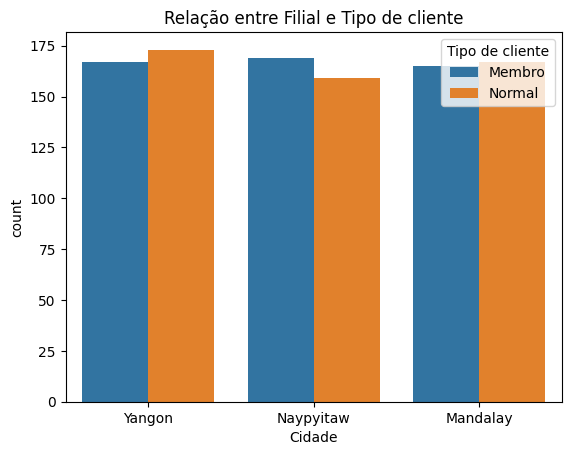

In [ ]:
sns.countplot(x='Cidade', hue='Tipo de cliente', data=data)
plt.title('Relação entre Filial e Tipo de cliente')
plt.show()